<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [66]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import re
import plotly.io as pio

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

**Важно:** Для обращения к базе данных перейдите по ссылке: https://drive.google.com/file/d/1SoKWU818zbNd0VfhpFLfoAbyQsz1j3zE/view?usp=sharing


In [67]:
hh_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [68]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [69]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [70]:
hh_data.describe(include=[object])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [71]:
# Функция преобразования признака "образование"
hh_data['Образование и ВУЗ']=hh_data['Образование и ВУЗ'].apply(lambda x: str(x).split())
def education(j):
    if j[0]in ["Высшее", "высшее", 'Неоконченное', 'неоконченное'] and j[1] in  ["Высшее", "высшее", 'Неоконченное', 'неоконченное']:
        j = "неоконченное высшее"
    if j[0]in ["Среднее", "среднее", 'Специальное', 'специальное'] and j[1] in  ["Среднее", "среднее", 'Специальное', 'специальное']:
        j = "среднее специальное"
    if j[0] == "Высшее":
        j = "высшее"
    if j[0] == "Среднее":
        j= "cреднее"
        
    return j

#Получаем новый признак,удаляем старый,проверяем
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education)
hh_data.drop(['Образование и ВУЗ'],axis=1,inplace=True)
hh_data['Образование'].unique()

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'cреднее'],
      dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [72]:
#Функция преобразования признака "Пол"
def gender(j):
    if 'Мужчина ' in j:
        j = "М"
    if 'Женщина ' in j:
        j = "Ж"           
    return j

#Функция преобразования признака "возраст"
def old(j):
    j= j[1][:3]
    j=int(j)
    return j

#Получаем новый признак и удаляем старый
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: str(x).split(',')).apply(gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: str(x).split(' , ')).apply(old)
hh_data.drop(['Пол, возраст'],axis=1,inplace=True)
#проверка
hh_data['Пол'].unique()

array(['М', 'Ж'], dtype=object)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [73]:
#Функция преобразования признака "Опыт работы (месяц)"
def job_old_month(i):
    j=str(i)
    j=j.split()
    if len(j) > 5 and j[3] in ['года', "лет",'год'] and j[5] in ["месяца", "месяцев", "месяц"]:
        j = int(j[2])*12+(int(j[4]))
        return j
    if len(j) > 5 and j[3] in ['года', "лет",'год'] and j[5] not in ["месяца", "месяцев", "месяц"]:
        j = int(j[2])*12
        return j
    if len(j) > 3 and j[3] in ["месяца", "месяцев", "месяц"]:
        j = int(j[2]) 
        return j
    else: 
        j=None
               
    return j
#Получаем новый признак и удаляем старый
hh_data['Опыт_работы_месяц'] = hh_data["Опыт работы"].apply(job_old_month)
hh_data['Опыт работы (месяц)']=hh_data.Опыт_работы_месяц.astype("Int64")
hh_data.drop(["Опыт работы"],axis=1,inplace=True)
hh_data.drop(['Опыт_работы_месяц'],axis=1,inplace=True)
#Проверка
hh_data['Опыт работы (месяц)'].unique() 
hh_data['Опыт работы (месяц)'].mean()

114.41894377888455

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [74]:
#Функция преобразования признака "Город, переезд, командировки"

# удаление скобок и всего что в них 
def remove_text_bet_bracet(text):
    n=1
    z=0
    while n:
        text, n = re.subn(r'\([^()]*\)', '', text)
    for i in text:
        if i != '(':
            z+=1
        else:
            text=text[0:z]
    text = text.replace(' ', '').split(',')
    #Удаление станций метро
    if text[1][0] == 'м':
        text.pop(1)
    return text       
 
        
hh_data["Город, переезд, командировки"]= hh_data["Город, переезд, командировки"].apply(remove_text_bet_bracet)

#Функция преобразования признака "Город"
def sity(i):
    million_cities = ['Новосибирск','Екатеринбург','Нижний Новгород','Казань','Челябинск','Омск','Самара','Ростов-на-Дону','Уфа','Красноярск','Пермь','Воронеж','Волгоград']
    z = i[0]
        
    if z in million_cities:
        z = "город-миллионник"
        return z     
    if z == "Москва":
        z = "Москва"
        return z     
    if z == "Санкт-Петербург":
        z = "Санкт-Петербург"
    else:
        z="другие"
    return z  

#Функция преобразования признака "Готовность к переезду"  
def relocation(i):
    z=''
    if i[1][0] == 'г' or i[1][0] == 'х':
        z = True
    elif i[1][0] == 'н':
        z = False
    else:
        z = 'Ошибка преобразования'
    return z    
    
#Функция преобразования признака "Готовность к командировкам"  
def freelance(i):
    z=''
    if len(i) > 2 and len(i[2])>3 and i[-1][0] =='г':
        z = True   
    elif len(i) > 2 and len(i[2])>3 and i[-1][0] =='н' :
        z = False
    elif len(i) ==2 or len(i[2])<3:
        z = False

    return z 

#Получаем новый признак и удаляем старый
hh_data['Город'] = hh_data["Город, переезд, командировки"].apply(sity)
hh_data["Готовность к переезду"] = hh_data["Город, переезд, командировки"].apply(relocation)
hh_data["Готовность к командировкам"] = hh_data["Город, переезд, командировки"].apply(freelance)
hh_data.drop(["Город, переезд, командировки"],axis=1,inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [75]:
#Функция "светофор"
def creat_column(df, colum, list):
    # преобразование исходного признака
    df[colum]=df[colum].apply(lambda x: str(x).split(', '))
    # создание новых призноков
    for i in list:
        df[i]=df[colum]
         #  булевый результат   
        df[i]=df[i].apply(lambda x: i in x)
    # Удаляем исходный признак        
    df.drop([colum],axis=1,inplace=True)

# применяем функцию

list_1=['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
list_2=['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']    
creat_column(hh_data, 'Занятость',list_1)    
creat_column(hh_data, 'График',list_2)             


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [76]:
#ваш код здесь
# чтение и преобразование таблицы курсов валюты
rate= pd.read_csv('ExchangeRates.csv', sep=',').drop(['per','time','vol'],axis=1)

# преобразование признаков в datetime
rate['date'] = pd.to_datetime(rate['date'], dayfirst=True)
hh_data['date'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
hh_data['date'] = pd.to_datetime(hh_data['date'], dayfirst=True)
# удаляем признак 'Обновление резюме'
hh_data.drop(['Обновление резюме'],axis=1,inplace=True)
#  Функция преобразования обозначения валют 
def cash_iso(currency):
    cash_list={"грн.":"UAH", "USD":"USD", 'EUR': 'EUR', 'бел.руб.': 'BYN', "KGS": 'KGS', 'сум': 'UZS', "AZN":"AZN", 'KZT':'KZT', 'руб.':'RUB'}
    if currency in cash_list:
        return cash_list[currency]
    else:
        return currency
# Преобразуем обозначения валют
hh_data['currency'] = hh_data['ЗП'].apply(lambda x: str(x).split(' ')[1]).apply(cash_iso)
hh_data['ЗП']= hh_data['ЗП'].apply(lambda x: int(str(x).split(' ')[0]))

# Объединение таблиц по столбцу 'date'
hh_data = hh_data.join(
    rate.set_index(['currency', 'date']),
    on=['currency','date'],
    how='left'
)

# обозначим курс RUB = 1
hh_data = hh_data.fillna({'close':1, 'currency':1, 'proportion':1})

# Создаём итоговый признак, удаляем - промежуточные
hh_data["ЗП (руб)"]=hh_data["ЗП"]*hh_data["close"]/hh_data["proportion"]
hh_data.drop(['ЗП','proportion', 'currency', 'close'],axis=1,inplace=True)

# Найдём медиану по ЗП(руб)
hh_data["ЗП (руб)"].median()


59019.0

In [77]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Авто                             44744 non-null  object        
 4   Образование                      44744 non-null  object        
 5   Пол                              44744 non-null  object        
 6   Возраст                          44744 non-null  int64         
 7   Опыт работы (месяц)              44574 non-null  Int64         
 8   Город                            44744 non-null  object        
 9   Готовность к переезду            44744 non-null  bool          
 10  Готовность к командировкам       44744 non-null  bool     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

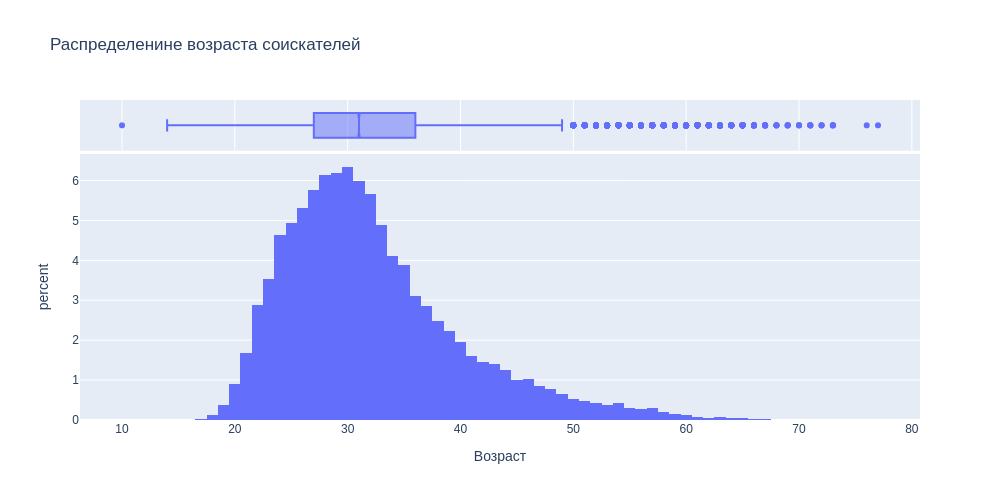

In [78]:
from dataclasses import dataclass

# построим распределение признака **"Возраст"**
fig = px.histogram(
    data_frame=hh_data,
    x='Возраст',
    title= "Распределенине возраста соискателей",
    width=1000,
    height=500,
    marginal='box',
    histnorm='percent'
)
fig.show('png')
# Сохраним график в HTML
#fig.write_html("plotly/histogram_1.html")
fig.write_image("plotly/histogram_1.png")

**Выводы:**
1. Мода распределения равна 30 годам;
2. Предельные значения признака['Возраст'] min= 10 лет max = 77 лет; 
3. Возраст большинства соискателей находится в интервале от 27 до 36 лет
4. Возраст соискателей менее 14 или более 65 лет я бы отнёс к аномальным значениям

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

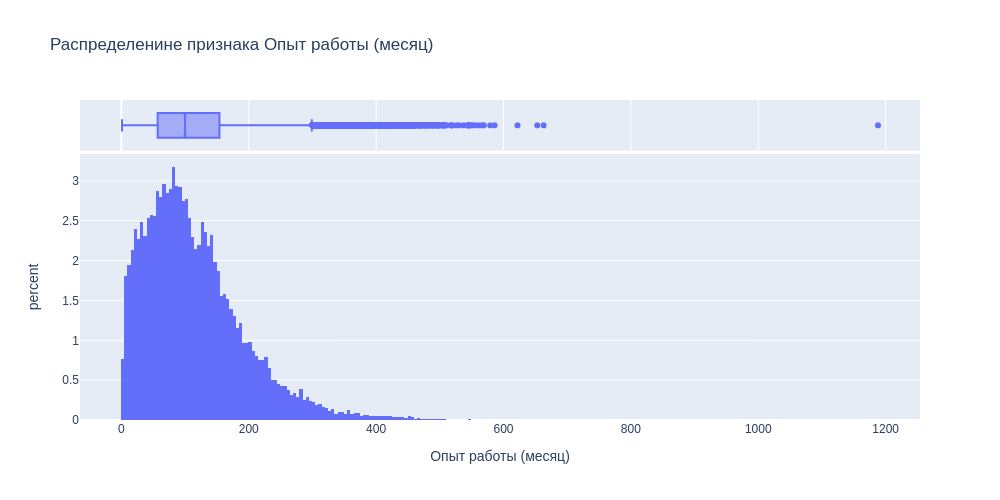

In [79]:
# распределение признака "Опыт работы (месяц)"
fig = px.histogram(
    data_frame= hh_data[hh_data["Опыт работы (месяц)"]!= None]["Опыт работы (месяц)"],
    title ="Распределенине признака Опыт работы (месяц)",
    x='Опыт работы (месяц)',
    #log_y=True,
    width=1000,
    height=500,
    marginal='box',
    histnorm='percent'
)

fig.show('png')
# Сохраним график в HTML
fig.write_html("plotly/histogram_2.html")

**Выводы:**
1. Мода распределения равна 81;
2. Предельные значения признака "Опыт работы (месяц)": min= 1, max = 1188; 
3. Опыт большинства соискателей находится в интервале от 57 до 154 мес
4. К аномальным значениям следует отнести стаж 1188 мес.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


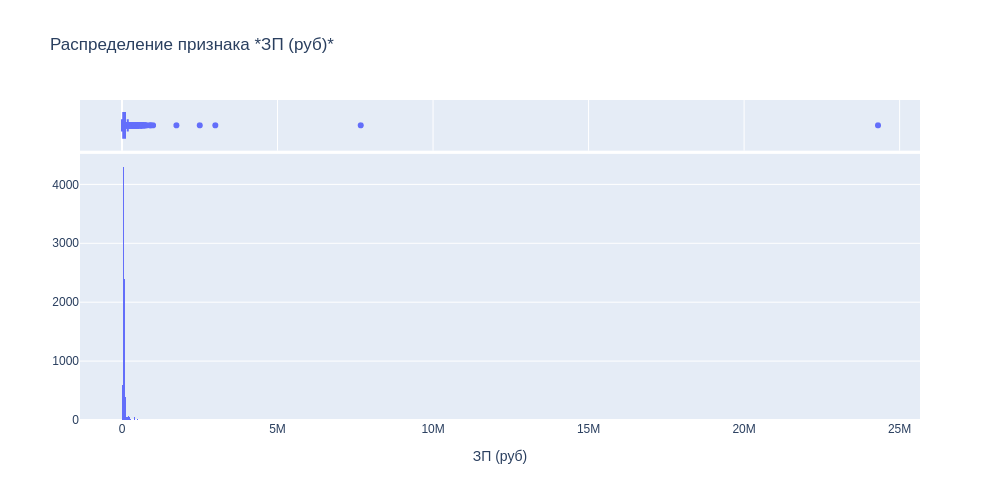

In [80]:
# распределение признака "ЗП (руб)"

fig = px. histogram(
    data_frame= hh_data['ЗП (руб)'],
    title= 'Распределение признака *ЗП (руб)*',
    x='ЗП (руб)',
    #log_y=True,
    #log_x=True,
    height=500,
    width=1000,
    marginal='box',
    histnorm=''
    )
fig.show('png')
# Сохраним график в HTML
fig.write_html("plotly/histogram_3.html")

**Выводы:**
1. Мода распределения признака "ЗП (руб)" равна 50000 руб
2. Предельные значения признака "ЗП (руб)": min= 1, max = 24304876; 
3. заработная плата большинства соискателей находится в интервале от 37000 до 95000 руб;
4. К аномальным значениям следует отнести заработную плату более 1000000 руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

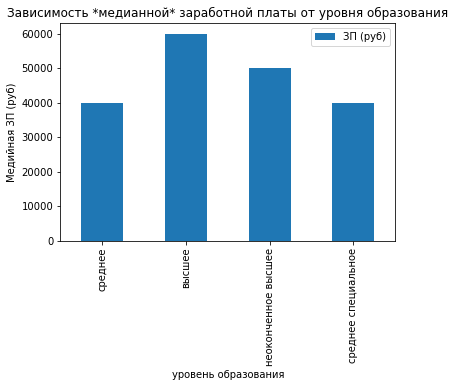

In [81]:
#зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**)
x= hh_data[hh_data['ЗП (руб)']<1000000][['ЗП (руб)', 'Образование']].groupby('Образование').median().plot(kind = 'bar', 
                                                                                                          title = 'Зависимость *медианной* заработной платы от уровня образования',
                                                                                                          xlabel = 'уровень образования',
                                                                                                          ylabel = 'Медийная ЗП (руб)')
        
        

**Выводы:**
1. Соискатели с высшим образованием ожидают наибольший уровень заработной платы, со средним и средне-специальным образованием - ожидают наименьший уровень ЗП.
2. уровнь образования - важный признак при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

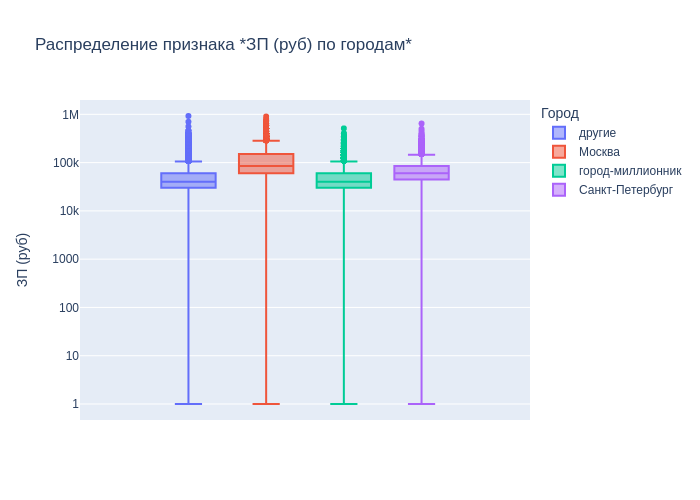

In [82]:
# распределение желаемой заработной платы (**"ЗП (руб)"**)
df = hh_data[hh_data['ЗП (руб)']<1000000][['ЗП (руб)', 'Город']]
fig = px. box(
    data_frame= df, y='ЗП (руб)', color='Город', 
    log_y=True,
    title='Распределение признака *ЗП (руб) по городам*',
    )
fig.show('png')
# Сохраним график в HTML
fig.write_html("plotly/box_1.html")

**Выводы:**
1. В Москве и Санкт-Петербурге медианный уровень и размах ожидаемой заработной платы выше чем в других городах.
2. "Город" - важный признак при прогнозировании заработной платы.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

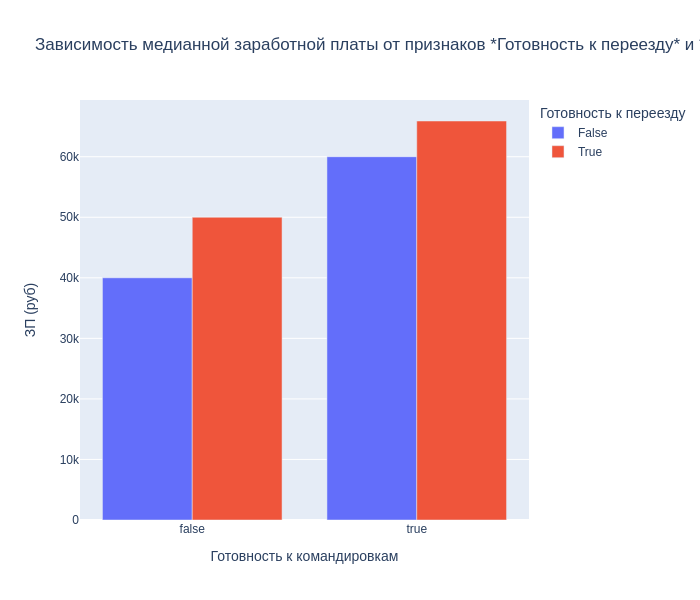

In [83]:
# Зависимость медианной заработной платы от признаков *Готовность к переезду* и *Готовность к командировкам*
df=hh_data.groupby(["Готовность к командировкам", 'Готовность к переезду'],as_index=False)['ЗП (руб)'].median()
fig = px.bar(df, x="Готовность к командировкам", color='Готовность к переезду', y='ЗП (руб)', barmode='group', height=600, \
    title="Зависимость медианной заработной платы от признаков *Готовность к переезду* и *Готовность к командировкам*")
fig.show('png')
df
# Сохраним график в HTML
fig.write_html("plotly/bar_1.html")

**Вывод:**
1. Ожидаемый уровень заработной платы существенно зависит от готовности соискателей к командировкам или переезду. При этом, соискатели готовые к командровкам желают больший уровень заработной платы чем соискатели готовые к переезду. На максимальный же уровень заработной платы рассчитывают соискатели готовые как на переезд, так и на командировки.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

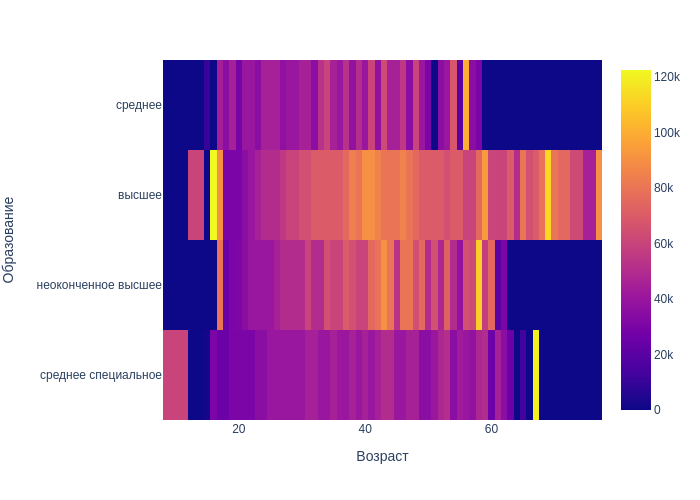

In [84]:
from cmath import nan
from statistics import mean, median

# Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**)
df = hh_data.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

fig = px.imshow(df)
fig.show('png')
# Сохраним график в HTML
fig.write_html("plotly/imshow.html")

**Выводы:**
1. Наиболее высокую заработную плату большинство соискатели ожидают в возростной группе от 35 до 50 лет. Для соискателей с вышим образованием эта группа шире (от 30 до 70 лет). 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

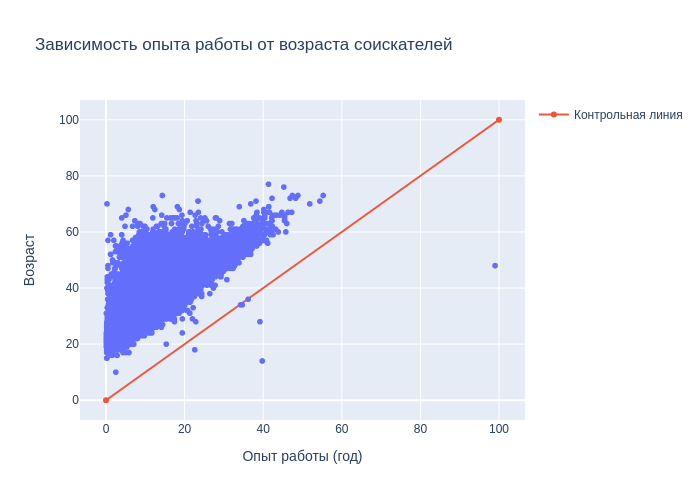

Количество резюме, где опыт соискателя превышает его возраст  - 7


In [85]:
from operator import index
from pdb import line_prefix
from unicodedata import name
# Диаграмма рассеяния показывающая зависимость опыта работы от возраста
df_data = hh_data.copy()
df_data['Опыт работы (год)']= df_data["Опыт работы (месяц)"]/12
df = df_data[df_data["Опыт работы (год)"]!= None]
fig = px.scatter(df, x="Опыт работы (год)", y="Возраст", title='Зависимость опыта работы от возраста соискателей')
fig.add_trace(go.Scatter(x=[0,100], y=[0,100], name='Контрольная линия'))
fig.show('png')
# Определим количество аномалий
n = df_data[df_data["Опыт работы (год)"]>df_data["Возраст"]]['Возраст'].count()
print(f'Количество резюме, где опыт соискателя превышает его возраст  - {n}')
# Сохраним график в HTML
fig.write_html("plotly/scatter.html")

**Вывод:** Количество резюме, где опыт соискателя превышает его возраст (можно отнести к аномальным значениям) равно семи.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


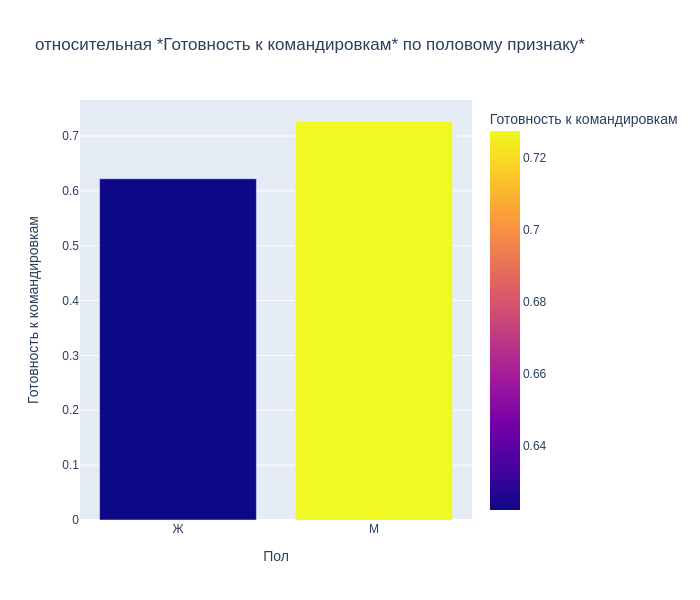

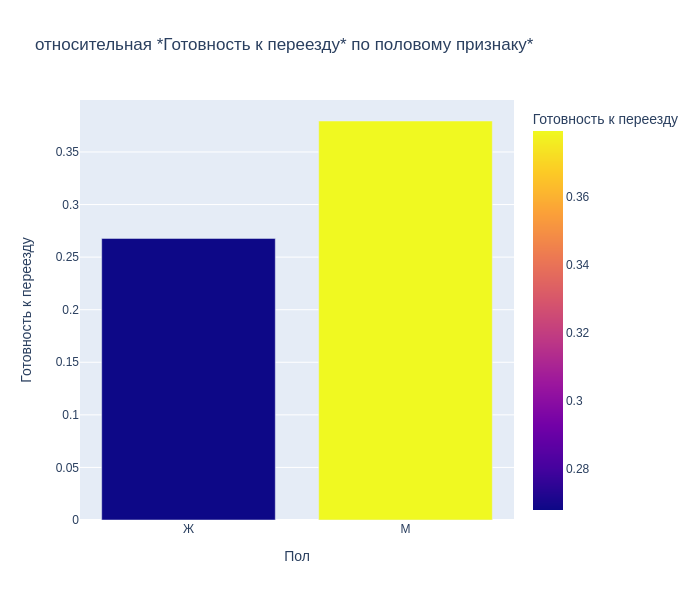

In [86]:
# Зависимость отражающая относительную *Готовность к командировкам* по половому признаку
df=hh_data.groupby(["Пол"],as_index=False)['Готовность к командировкам'].mean()
fig1 = px.bar(df, x="Пол", color='Готовность к командировкам', y='Готовность к командировкам', barmode='group', height=600, \
    title="относительная *Готовность к командировкам* по половому признаку*")

# Зависимость отражающая относительную *Готовность к переезду* по половому признаку
df2=hh_data.groupby(["Пол"],as_index=False)['Готовность к переезду'].mean()
fig2 = px.bar(df2, x="Пол", color='Готовность к переезду', y='Готовность к переезду', barmode='group', height=600, \
    title="относительная *Готовность к переезду* по половому признаку*")
fig1.show('png')
fig2.show('png')
# Сохраним графики в HTML
fig1.write_html("plotly/bar_2.html")
fig2.write_html("plotly/bar_3.html")

**Вывод:** Относительная готовность среди мужчин как к командировкам так и к переезду выше чем среди женщин

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [87]:
# создаём маску дубликатов
mask = hh_data.duplicated()
# фильтруем по маске
hh_duplicates = hh_data[mask]
# выводим число строк после фильтрации (число дублкатов)
print(f'число полных дубликатов: {hh_duplicates.shape[0]}')
#  удалим дубликаты
hh_deduplicated = hh_data.drop_duplicates()




число полных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [88]:
# определим число пропусков с столбцах
count_hh_isnul = hh_deduplicated.isnull().sum()
display(count_hh_isnul)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
date                                 0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [89]:
# создадим копию датафрейма
fill_hh_data = hh_deduplicated.copy()
# заполним пропущенные значения в столбце "Опыт работы (месяц)"
fill_hh_data=fill_hh_data.fillna({"Опыт работы (месяц)":fill_hh_data["Опыт работы (месяц)"].median()})
# удалим все оставшиеся строки с пропусками 
fill_hh_data = fill_hh_data.dropna()
# среднее значение в столбце "Опыт работы (месяц)"
display(f'Cреднее значение в столбце *Опыт работы (месяц)*: {round(fill_hh_data["Опыт работы (месяц)"].mean())}')

'Cреднее значение в столбце *Опыт работы (месяц)*: 114'

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [90]:
# фильтруем значения по величине заработной платы
filt_zp = fill_hh_data[(fill_hh_data['ЗП (руб)']<1000) | (fill_hh_data['ЗП (руб)']>1000000) ]
display(f'Количество выбросов: {filt_zp.shape[0]}')
# удалим отфильтрованное
fill_hh_data= fill_hh_data.drop(filt_zp.index, axis = 0)




'Количество выбросов: 89'

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [91]:
# фильтруем значения по величине заработной платы
filt_zp = fill_hh_data[fill_hh_data['Опыт работы (месяц)']/12 > fill_hh_data['Возраст']]
display(f'Количество выбросов: {filt_zp.shape[0]}')
# удалим отфильтрованное
fill_hh_data= fill_hh_data.drop(filt_zp.index, axis = 0)

'Количество выбросов: 7'

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,date,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,Не указано,cреднее,М,15,2,Санкт-Петербург,False,...,False,False,False,False,True,True,True,False,2019-04-06,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,Не указано,среднее специальное,М,15,3,другие,False,...,False,False,False,True,False,False,False,False,2019-04-09,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,Не указано,среднее специальное,М,10,30,Санкт-Петербург,False,...,True,False,True,True,False,True,True,False,2019-04-19,60000.0


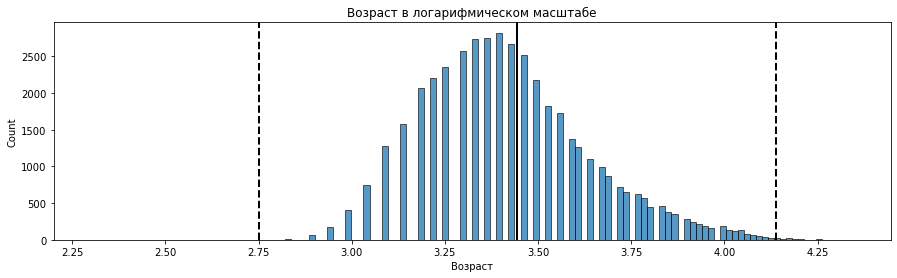

In [92]:
# копируем датафрейм
from pickle import TRUE
from typing import final


df_hh_data = fill_hh_data.copy()

# Построим распределение признака "Возраст"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
log_hh_age = np.log(df_hh_data['Возраст'])
histplot = sns.histplot(data=df_hh_data, x=log_hh_age, ax=ax)
histplot.axvline(log_hh_age.mean(), color='k', lw=2)
histplot.axvline(log_hh_age.mean()+ 3 * log_hh_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_hh_age.mean()- 3 * log_hh_age.std(), color='k', ls='--', lw=2)
histplot.set_title("Возраст в логарифмическом масштабе");

# функция поиска и удаления Z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
# применим функцию
outliers, cleaned = outliers_z_score(df_hh_data, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
# Выведем выбросы
display(outliers)
# сохраним финальный очищенный датафрейм
final_hh_data=cleaned.copy()

**Выводы:** 1. Логарифмическое распределение асимметрично в правую сторону. 2. В число выбросов попали обьявления, где возраст соискателя менее 16 лет.